In [21]:
# ----------------------------------------------- #
# Import & Load CSVs
# ----------------------------------------------- #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

woodside_df = pd.read_csv('./data/2023/cleaned/456/456_61St-Woodside_2023_cleaned.csv')
bryant_df = pd.read_csv('./data/2023/cleaned/609/609_BryantPk5Av_2023_cleaned.csv')
dekalb_df = pd.read_csv('./data/2023/cleaned/127/127_Dekalb_2023_cleaned.csv')
jay_df = pd.read_csv('./data/2023/cleaned/636/636_JayStMetrotech_2023_cleaned.csv')

all_df = pd.concat([woodside_df, bryant_df])


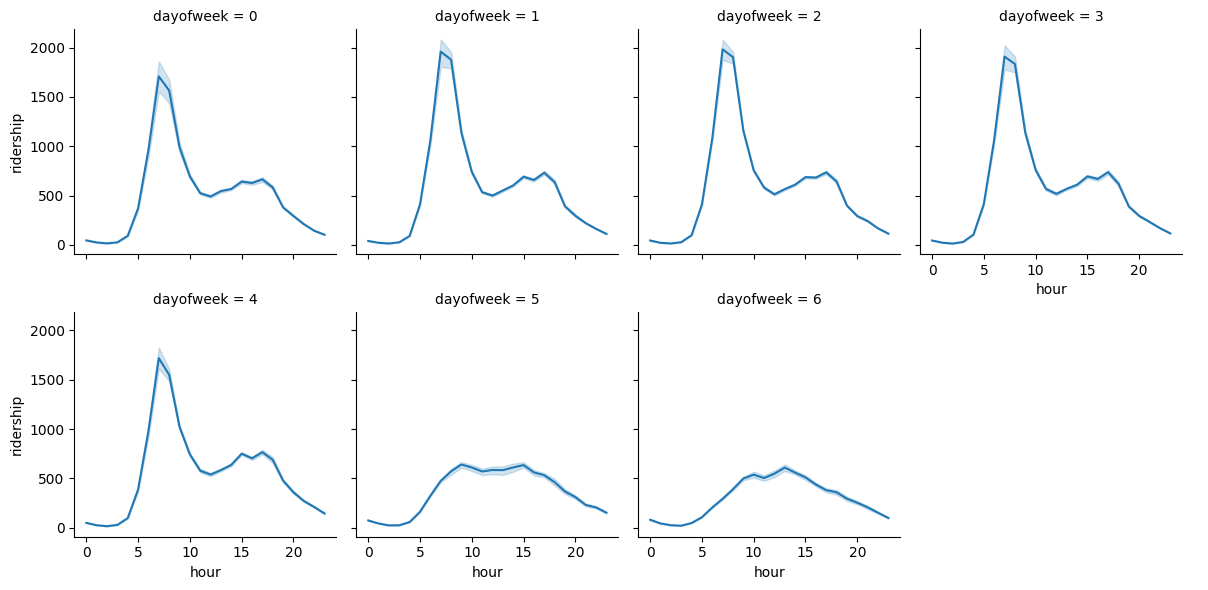

In [6]:
# ----------------------------------------------- #
# Graph Just One
# ----------------------------------------------- #

g = sns.FacetGrid(woodside_df, col="dayofweek", col_wrap=4)
g.map_dataframe(sns.lineplot, x="hour", y="ridership")
g.add_legend()

In [22]:
# ----------------------------------------------- #
# ADD Weekday / Weekend Split
# ----------------------------------------------- #

def typeofday(dayofweek):
    if dayofweek < 5:
        return 'Weekday'
    else:
        return 'Weekend'

all_df['typeofday'] = all_df['dayofweek'].apply(typeofday)

all_df[:5]


,transit_timestamp,year,month,day,dayofweek,hour,ridership,transfers,station_complex_id,station_complex,borough,typeofday
0,2023-01-01 00:00:00,2023,1,1,6,0,85.0,0.0,456,61 St-Woodside (7),Queens,Weekend
1,2023-01-01 01:00:00,2023,1,1,6,1,113.0,2.0,456,61 St-Woodside (7),Queens,Weekend
2,2023-01-01 02:00:00,2023,1,1,6,2,80.0,0.0,456,61 St-Woodside (7),Queens,Weekend
3,2023-01-01 03:00:00,2023,1,1,6,3,41.0,0.0,456,61 St-Woodside (7),Queens,Weekend
4,2023-01-01 04:00:00,2023,1,1,6,4,63.0,0.0,456,61 St-Woodside (7),Queens,Weekend


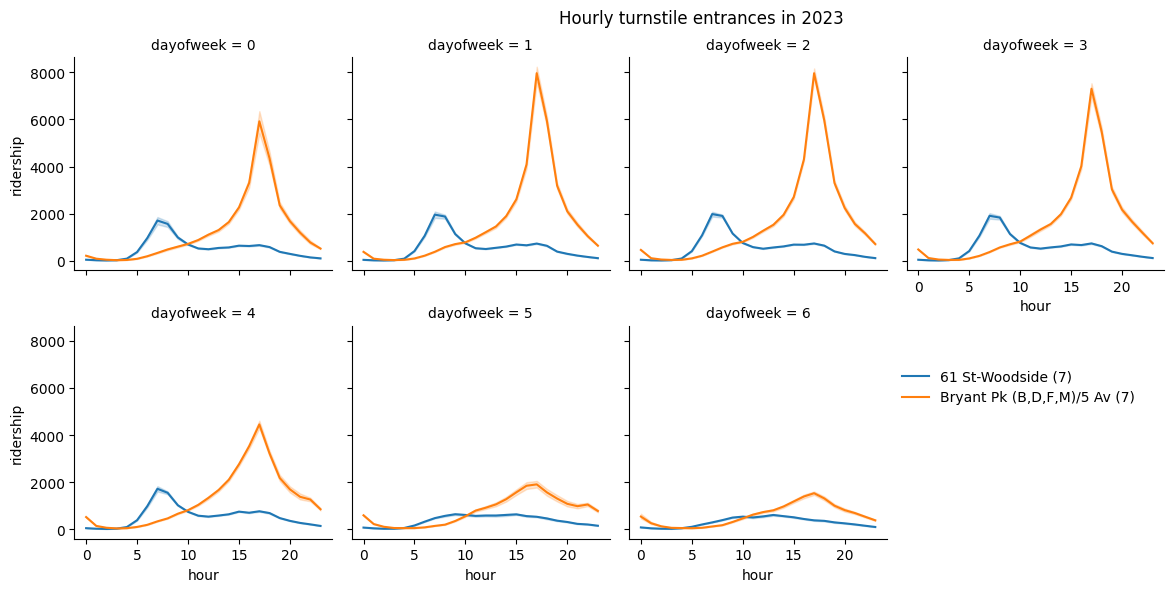

In [45]:
# ----------------------------------------------- #
# PLOT: Ridership by days of the week
# ----------------------------------------------- #
# Variance is the 95% confidence interval

g = sns.FacetGrid(all_df, col="dayofweek", col_wrap = 4)
g.map_dataframe(sns.lineplot, x="hour", y="ridership", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Hourly turnstile entrances in 2023')
sns.move_legend(g, "lower left", bbox_to_anchor=(.63, .3))

# Save the plot as a PNG file
plt.savefig("./data/2023/woodside-bryantpk-dayofweek.png", dpi=300)

In [23]:
# Calculate the sum of each group
group_sums_wk = all_df.groupby(by=["year",
                             "station_complex",
                             "station_complex_id",
                             "borough",
                             "month",
                             "dayofweek"])['ridership'].transform('sum')

# Divide the 'value' column by the group sums
all_df['normalized_value'] = all_df['ridership'] / group_sums_wk

all_df[:5]


,transit_timestamp,year,month,day,dayofweek,hour,ridership,transfers,station_complex_id,station_complex,borough,typeofday,normalized_value
0,2023-01-01 00:00:00,2023,1,1,6,0,85.0,0.0,456,61 St-Woodside (7),Queens,Weekend,0.002572
1,2023-01-01 01:00:00,2023,1,1,6,1,113.0,2.0,456,61 St-Woodside (7),Queens,Weekend,0.003420
2,2023-01-01 02:00:00,2023,1,1,6,2,80.0,0.0,456,61 St-Woodside (7),Queens,Weekend,0.002421
3,2023-01-01 03:00:00,2023,1,1,6,3,41.0,0.0,456,61 St-Woodside (7),Queens,Weekend,0.001241
4,2023-01-01 04:00:00,2023,1,1,6,4,63.0,0.0,456,61 St-Woodside (7),Queens,Weekend,0.001906


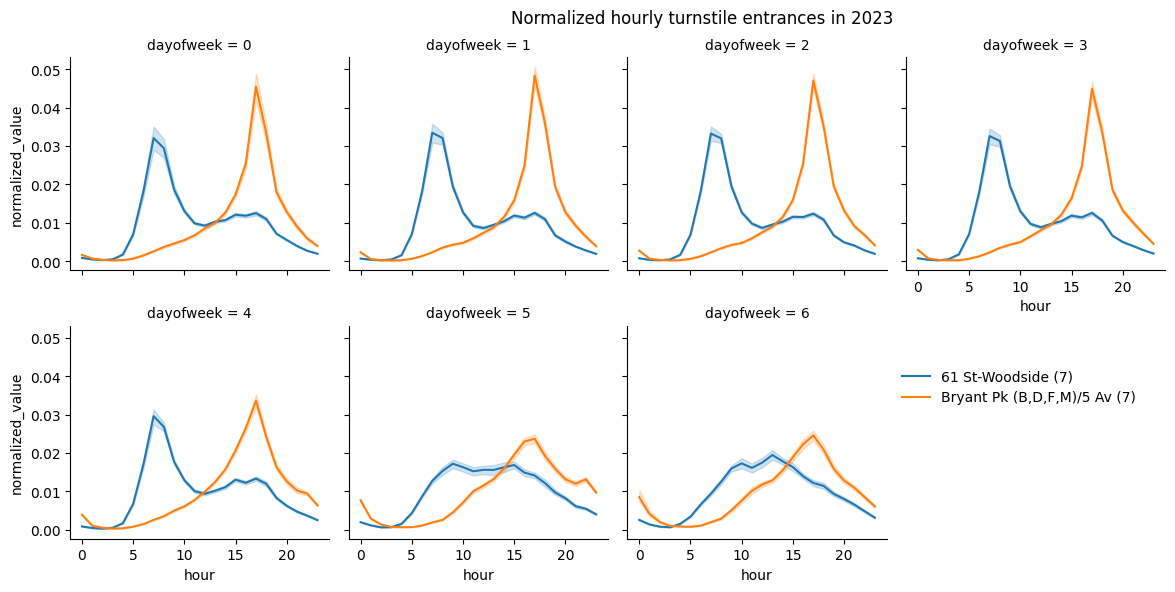

In [46]:
# ----------------------------------------------- #
# PLOT: NORMALIZED Ridership by days of the week
# ----------------------------------------------- #
# Variance is the 95% confidence interval

g = sns.FacetGrid(all_df, col="dayofweek", col_wrap = 4)
g.map_dataframe(sns.lineplot, x="hour", y="normalized_value", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Normalized hourly turnstile entrances in 2023')
sns.move_legend(g, "lower left", bbox_to_anchor=(.63, .3))


# Save the plot as a PNG file
plt.savefig("./data/2023/woodside-bryantpk-dayofweek-norm.png", dpi=300)

Text(0.5, 0.98, 'Hourly turnstile entrances on weekdays in 2023')

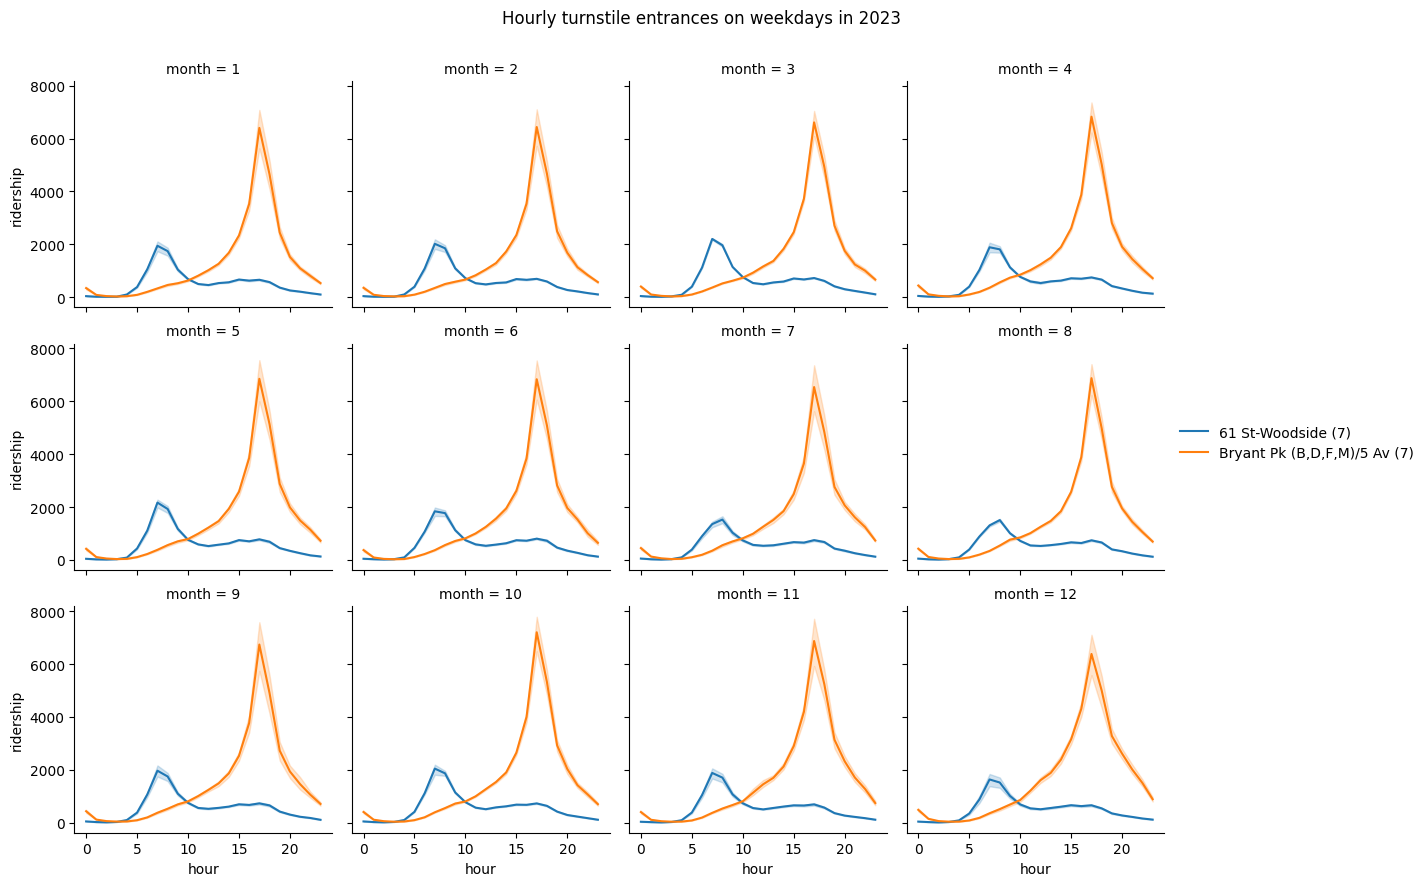

In [8]:
# ----------------------------------------------- #
# PLOT: Ridership on WeekDAYS by Month
# ----------------------------------------------- #
# Variance is the 95% confidence interval

g = sns.FacetGrid(all_df.loc[all_df['typeofday']== 'Weekday'], col="month", col_wrap = 4)
g.map_dataframe(sns.lineplot, x="hour", y="ridership", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Hourly turnstile entrances on weekdays in 2023')

Text(0.5, 0.98, 'Hourly turnstile entrances on weekdays in 2023')

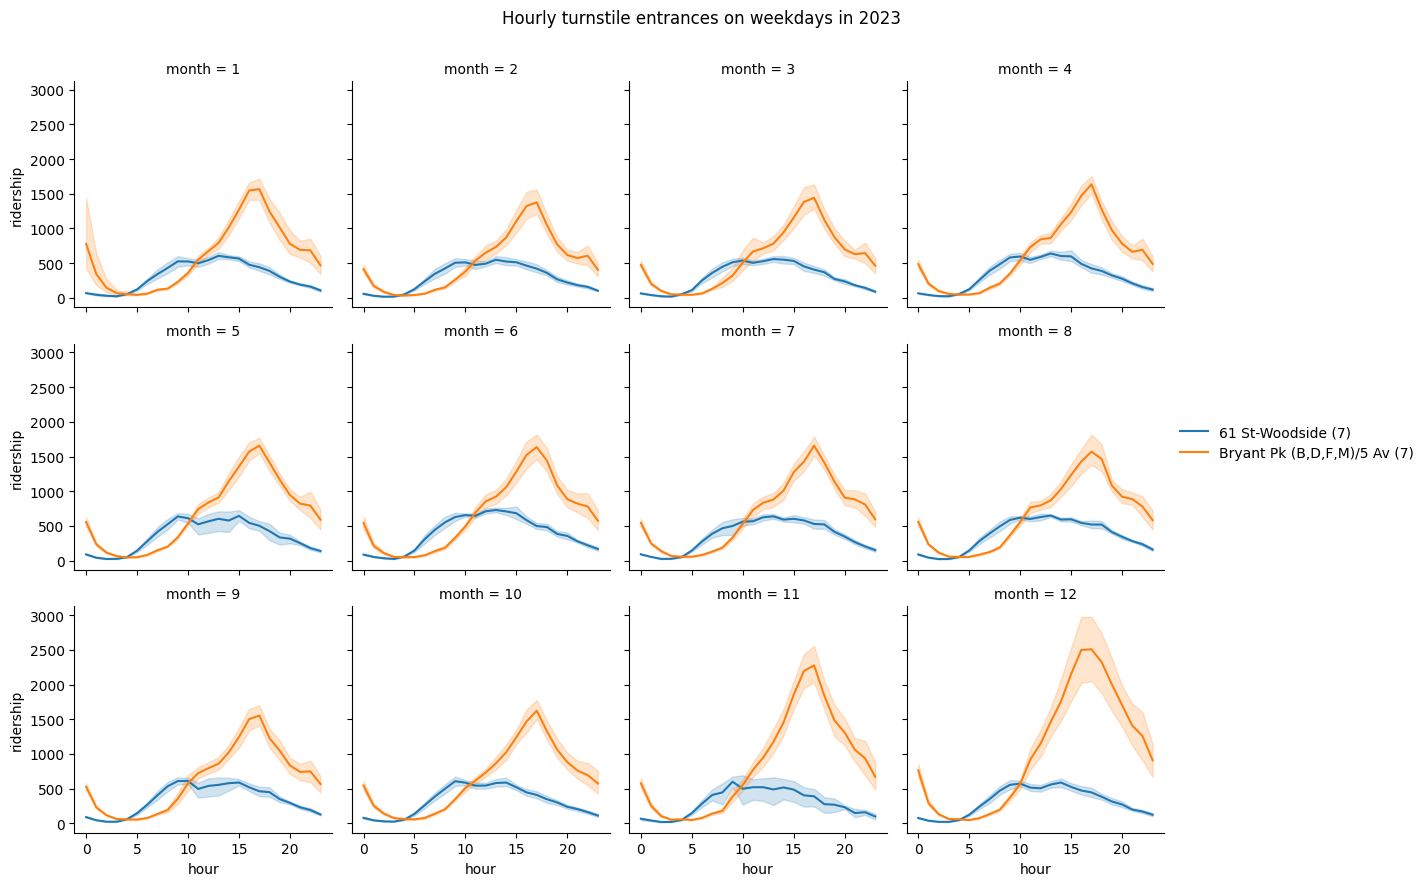

In [9]:
# ----------------------------------------------- #
# PLOT: Ridership on WeekEND by Month
# ----------------------------------------------- #
# Variance is the 95% confidence interval

g = sns.FacetGrid(all_df.loc[all_df['typeofday']== 'Weekend'], col="month", col_wrap = 4)
g.map_dataframe(sns.lineplot, x="hour", y="ridership", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Hourly turnstile entrances on weekdays in 2023')

In [10]:
# -------------------------------------------------- #
# Average Ridership Per Hour on Weekends vs. Weekdays
# -------------------------------------------------- #

all_df_mavg = all_df.groupby(by=["year",
                                 "station_complex",
                                 "station_complex_id",
                                 "borough",
                                 "month",
                                 "typeofday",
                                 "hour"])['ridership'].mean().reset_index()

all_df_mavg.tail(5)


,year,station_complex,station_complex_id,borough,month,typeofday,hour,ridership
1147,2023,"Bryant Pk (B,D,F,M)/5 Av (7)",609,Manhattan,12,Weekend,19,2002.5
1148,2023,"Bryant Pk (B,D,F,M)/5 Av (7)",609,Manhattan,12,Weekend,20,1705.1
1149,2023,"Bryant Pk (B,D,F,M)/5 Av (7)",609,Manhattan,12,Weekend,21,1408.1
1150,2023,"Bryant Pk (B,D,F,M)/5 Av (7)",609,Manhattan,12,Weekend,22,1259.7
1151,2023,"Bryant Pk (B,D,F,M)/5 Av (7)",609,Manhattan,12,Weekend,23,907.8


In [11]:
# -------------------------------------------------- #
# Normalized Average Ridership on Weekdays by Month
# -------------------------------------------------- #
# Divide average against TOTAL

# Calculate the sum of each group
group_sums = all_df_mavg.groupby(by=["year",
                             "station_complex",
                             "station_complex_id",
                             "borough",
                             "month",
                             "typeofday"])['ridership'].transform('sum')

# Divide the 'value' column by the group sums
all_df_mavg['normalized_value'] = all_df_mavg['ridership'] / group_sums

all_df_mavg[:5]


,year,station_complex,station_complex_id,borough,month,typeofday,hour,ridership,normalized_value
0,2023,61 St-Woodside (7),456,Queens,1,Weekday,0,40.363636,0.003174
1,2023,61 St-Woodside (7),456,Queens,1,Weekday,1,18.000000,0.001415
2,2023,61 St-Woodside (7),456,Queens,1,Weekday,2,15.045455,0.001183
3,2023,61 St-Woodside (7),456,Queens,1,Weekday,3,18.318182,0.001440
4,2023,61 St-Woodside (7),456,Queens,1,Weekday,4,103.136364,0.008109


Text(0.5, 0.98, 'Average hourly turnstile entrances on weekdays in 2023')

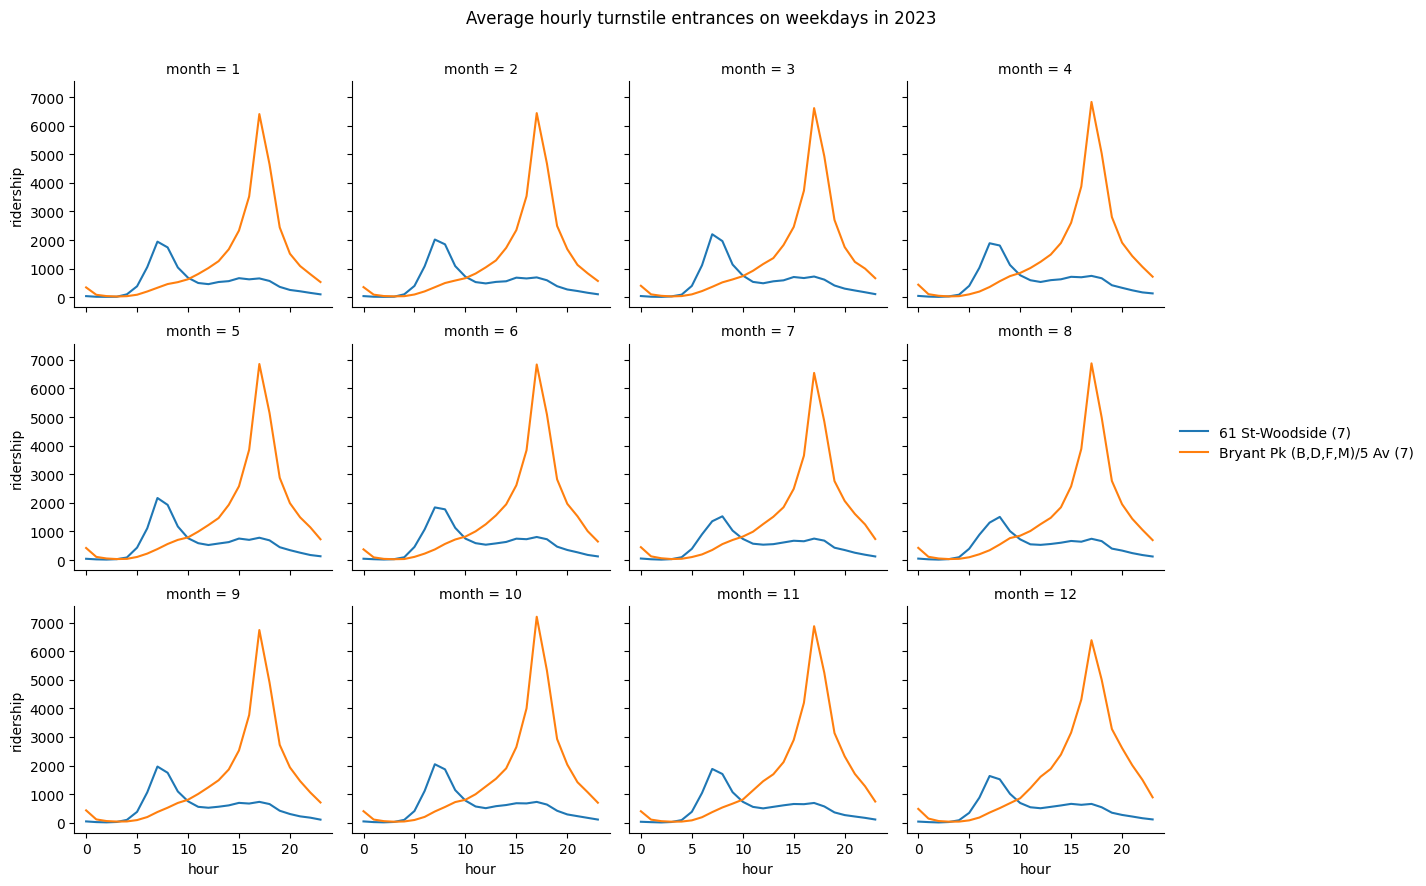

In [12]:
# ----------------------------------------------- #
# PLOT: Average Ridership on WeekDAYS by Month
# ----------------------------------------------- #
g = sns.FacetGrid(all_df_mavg.loc[all_df_mavg['typeofday']== 'Weekday'], col="month", col_wrap = 4)
g.map_dataframe(sns.lineplot, x="hour", y="ridership", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Average hourly turnstile entrances on weekdays in 2023')



Text(0.5, 0.98, 'Normalized average hourly turnstile entrances on weekdays in 2023')

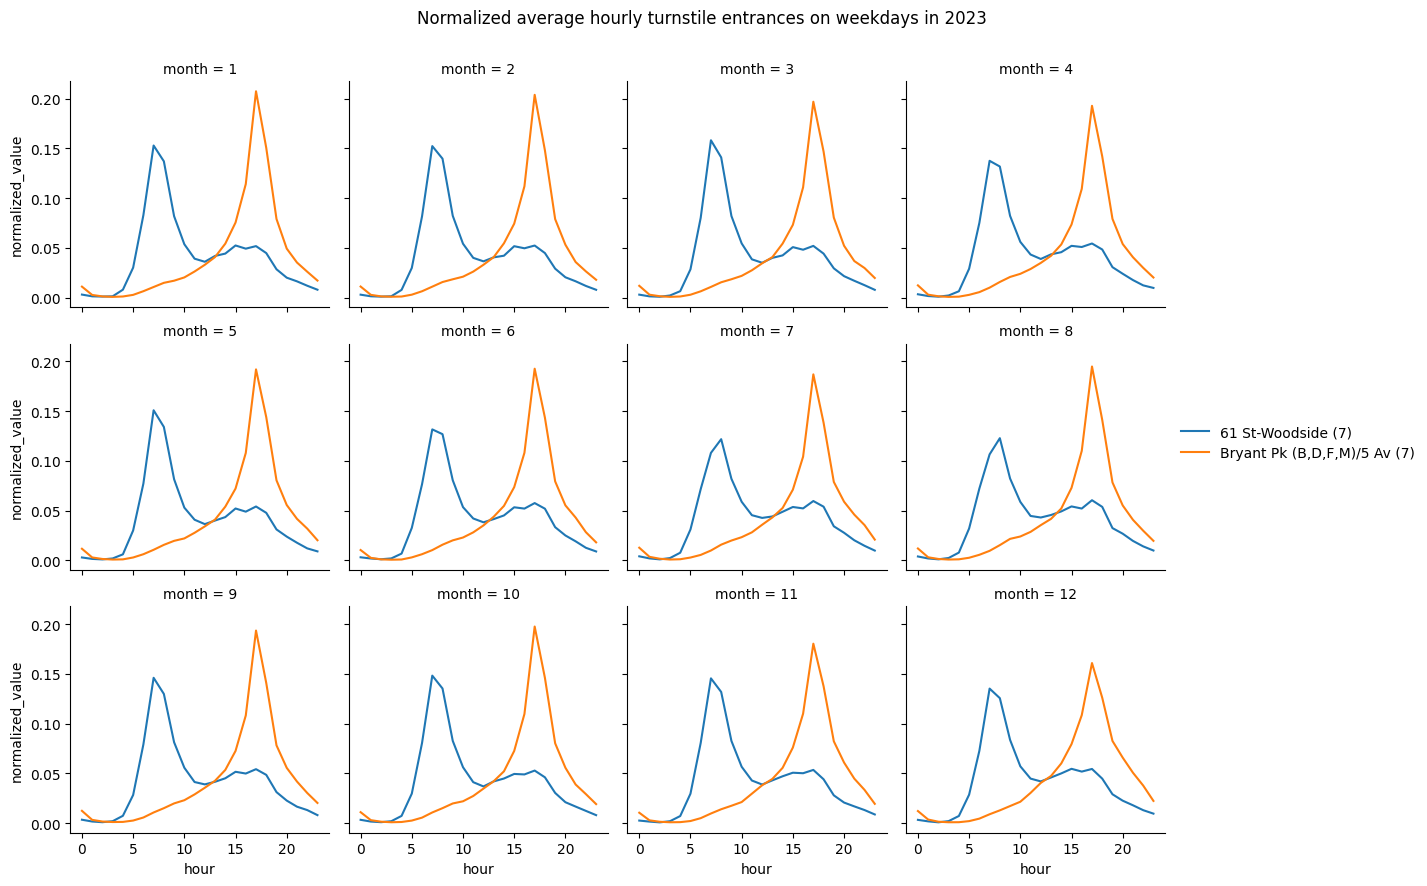

In [13]:
# ------------------------------------------------------ #
# PLOT Normalized Average Ridership on Weekdays by Month
# ------------------------------------------------------ #

# group by station, stationid
# ridership_norm = ridership / ridership_sumofgroup

g = sns.FacetGrid(all_df_mavg.loc[all_df_mavg['typeofday']== 'Weekday'], col="month", col_wrap = 4)
g.map_dataframe(sns.lineplot, x="hour", y="normalized_value", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Normalized average hourly turnstile entrances on weekdays in 2023')

Text(0.5, 0.98, 'Average hourly turnstile entrances on weekend days in 2023')

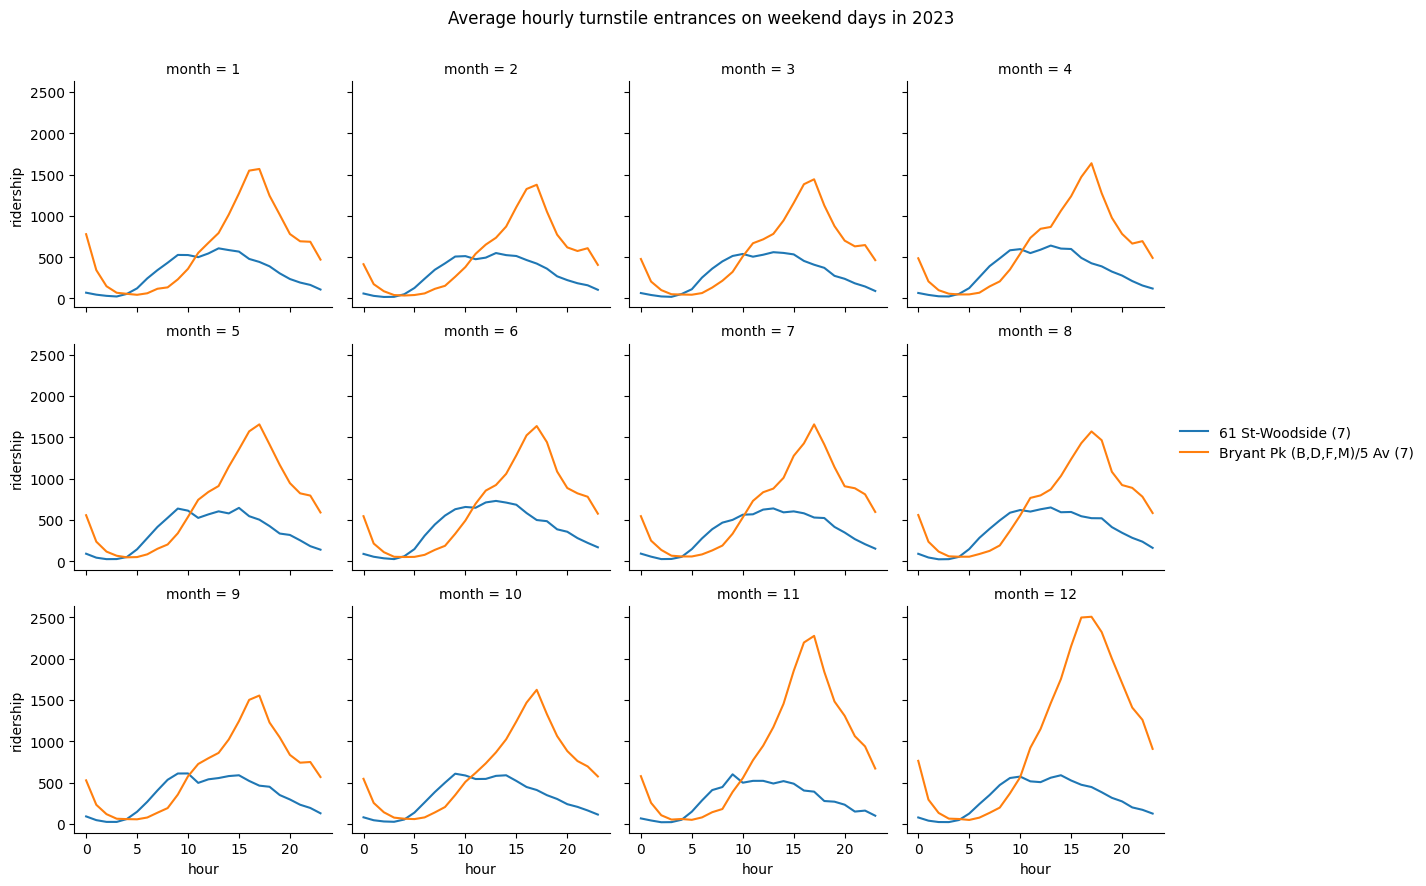

In [14]:
# ----------------------------------------------- #
# PLOT: Average Ridership on WEEKEND by Month
# ----------------------------------------------- #
g = sns.FacetGrid(all_df_mavg.loc[all_df_mavg['typeofday']== 'Weekend'], col="month", col_wrap = 4)
g.map_dataframe(sns.lineplot, x="hour", y="ridership", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Average hourly turnstile entrances on weekend days in 2023')



Text(0.5, 0.98, 'Normalized average hourly turnstile entrances on weekend days in 2023')

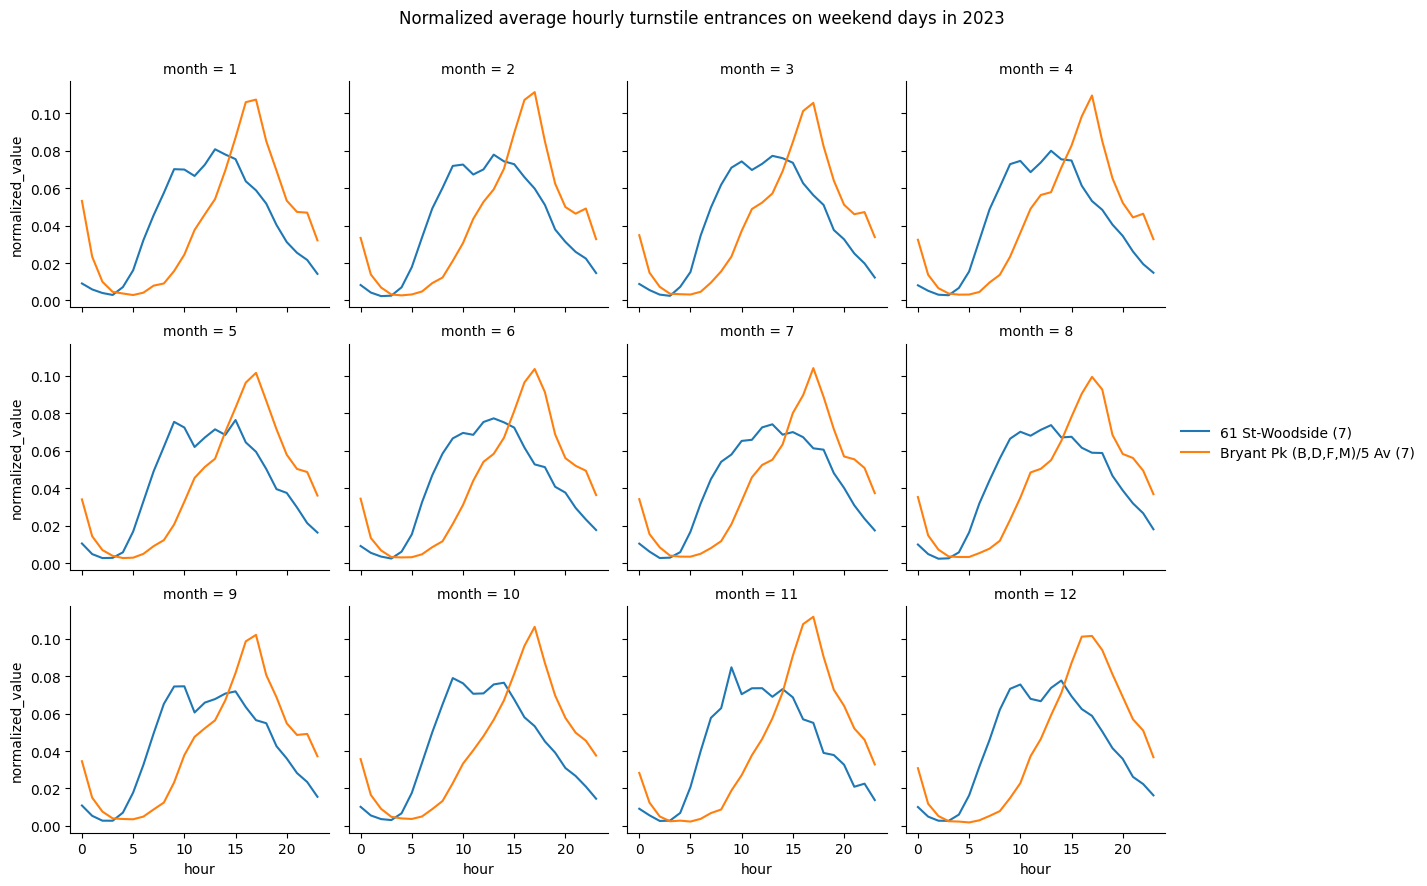

In [15]:
# ------------------------------------------------------ #
# PLOT: Normalized Average Ridership on WEEKEND by Month
# ------------------------------------------------------ #
g = sns.FacetGrid(all_df_mavg.loc[all_df_mavg['typeofday']== 'Weekend'], col="month", col_wrap = 4)
g.map_dataframe(sns.lineplot, x="hour", y="normalized_value", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Normalized average hourly turnstile entrances on weekend days in 2023')

